In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.special import jv
from scipy.special import yv
from scipy.optimize import root

In [2]:
Q = 150  # m/s^3
A = 2000 # m^2
k = 400
kappa = k
R = 10000
L = 10000

pi = np.pi

a = A/pi

### Finding eigenfunctions and -values

In [3]:
order = Q/(2*kappa*pi)
def phi_bessel(r,par):
    return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[1]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))

Bessel:


<ipython-input-7-8eb9fac5ef70>:29: RuntimeWarning: invalid value encountered in sqrt
  return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[1]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))


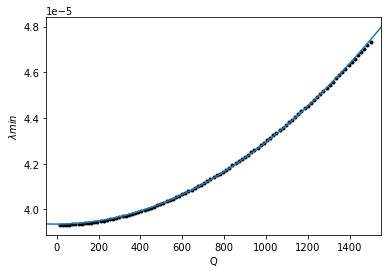

$\lambda = a Q^2 +b$
a= 3.5867063822299096e-12 ± 4.669501377845255e-15
b= 3.9355141101423214e-05 ± 4.757351792255919e-09


In [7]:
from scipy.optimize import root

phi_a = lambda x: phi_bessel(a,x)
phi_R = lambda x: phi_bessel(R,x)

def func(x):
    return phi_a(x),phi_R(x)

def is_new(r,rootz):
    temp = True
    for j in range(len(rootz)):
        if ( abs(r[0]-rootz[j][0])<0.01*abs(r[0]) ) and ( abs(r[1]-rootz[j][1])<0.01*abs(r[1]) ):
            temp = False
    return temp

roots = [1e-5]
ds = [1]

Qspace = np.linspace(Q/10,10*Q,100)

# Find roots of bessel
print('Bessel:')
for q in Qspace:
    rts = [1e-3]
    dts = [1]
    
    order = q/(2*kappa*pi)
    def phi_bessel(r,par):
        return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[1]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))
    
    phi_a = lambda x: phi_bessel(a,x)
    phi_R = lambda x: phi_bessel(R,x)

    def func(x):
        return phi_a(x),phi_R(x)

    for j in np.linspace(max(roots),2*max(roots),20):
        rt = root(func, x0 =(j,1)).x
        #print(rt)
        rts.append(rt[0])
        dts.append(rt[1])
    roots.append(min(rts))
    ds.append(min(dts))
    
from scipy.optimize import curve_fit

def fitfunc(q, a, b):
    return a*q**2 + b

par, cov = curve_fit(fitfunc, Qspace, roots[1:])

x = np.linspace(-50,1550,100)
plt.figure()
plt.plot(Qspace, roots[1:], 'k.')
plt.plot(x, fitfunc(x, *par))
plt.xlabel('Q')
plt.ylabel('$\lambda min$')
#plt.yscale('log')
plt.xlim(-50, 1550)
plt.show()

print(r"$\lambda = a Q^2 +b$")
print('a=', par[0], '±', np.sqrt(cov[0,0]))
print('b=', par[1], '±', np.sqrt(cov[1,1]))

Bessel:


<ipython-input-45-c4a6b830fcf1>:14: RuntimeWarning: invalid value encountered in sqrt
  return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[1]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))


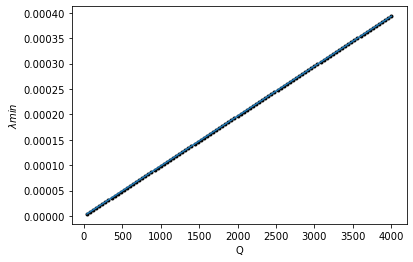

$\lambda = a \kappa +b$
a= 9.825657937357133e-08 ± 7.245036691152722e-12
b= 1.2455190916992487e-07 ± 1.6857251344680957e-08


In [45]:
roots = [1e-5]
ds = [1]

kappaspace = np.linspace(kappa/10,10*kappa,100)

# Find roots of bessel
print('Bessel:')
for kappa in kappaspace:
    rts = [1e-3]
    dts = [1]
    
    order = Q/(2*kappa*pi)
    def phi_bessel(r,par):
        return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[1]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))
    
    phi_a = lambda x: phi_bessel(a,x)
    phi_R = lambda x: phi_bessel(R,x)

    def func(x):
        return phi_a(x),phi_R(x)

    for j in np.linspace(max(roots),2*max(roots),20):
        rt = root(func, x0 =(j,1)).x
        #print(rt)
        rts.append(rt[0])
        dts.append(rt[1])
    roots.append(min(rts))
    ds.append(min(dts))
    
from scipy.optimize import curve_fit

def fitfunc(kappa, a, b):
    return a*kappa + b

par, cov = curve_fit(fitfunc, kappaspace, roots[1:])
    
plt.figure()
plt.plot(kappaspace, roots[1:], 'k.')
plt.plot(kappaspace, fitfunc(kappaspace, *par))
plt.xlabel('kappa')
plt.ylabel('$\lambda min$')
#plt.yscale('log')
plt.show()

print(r"$\lambda = a \kappa +b$")
print('a=', par[0], '±', np.sqrt(cov[0,0]))
print('b=', par[1], '±', np.sqrt(cov[1,1]))

Bessel:


/Users/hugo/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


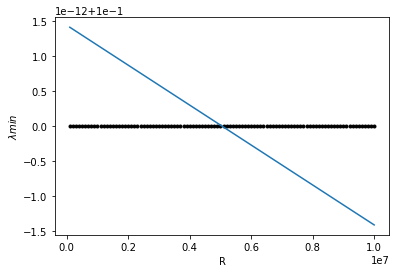

$\lambda = a R +b$
a= -2.845575244527598e-19 ± inf
b= 0.10000000000143702 ± inf


In [48]:
roots = [10]
ds = [1]

Rspace = np.linspace(R/10,10*R,100)

# Find roots of bessel
print('Bessel:')
for R in Rspace:
    rts = [1e-1]
    dts = [1]
    
    order = Q/(2*kappa*pi)
    def phi_bessel(r,par):
        return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[1]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))
    
    phi_a = lambda x: phi_bessel(a,x)
    phi_R = lambda x: phi_bessel(R,x)

    def func(x):
        return phi_a(x),phi_R(x)

    for j in np.linspace(max(roots),2*max(roots),20):
        rt = root(func, x0 =(j,1)).x
        #print(rt)
        rts.append(rt[0])
        dts.append(rt[1])
    roots.append(min(rts))
    ds.append(min(dts))
    
from scipy.optimize import curve_fit

def fitfunc(R, a, b):
    return a*R + b

par, cov = curve_fit(fitfunc, Rspace, roots[1:])
    
plt.figure()
plt.plot(Rspace, roots[1:], 'k.')
plt.plot(Rspace, fitfunc(Rspace, *par))
plt.xlabel('R')
plt.ylabel('$\lambda min$')
#plt.yscale('log')
plt.show()

print(r"$\lambda = a R +b$")
print('a=', par[0], '±', np.sqrt(cov[0,0]))
print('b=', par[1], '±', np.sqrt(cov[1,1]))